In [1]:
import sys
import logging

sys.path.append("../")
from experiments.pomps_paper_example import *
import pandas as pd
import networkx as nx


In [5]:
smoke_test = False
n_iter = 400
exp = POMPSExperiment(fcm, {"X1", "X2"}, {"C"}, domain, "Y", [MixedPolicyScope(set())],
                          n_iter=16 if smoke_test else n_iter, debug=True, experiment_name='test')

In [3]:
exp.policies_active[0][0].induced_graph().edges

OutEdgeView([('C', 'Y'), ('C', 'X2'), ('C', 'X1'), ('X2', 'Y'), ('U1', 'C'), ('U1', 'X1')])

In [4]:
exp.iterate()

  0%|          | 0/400 [00:00<?, ?it/s]

('None detected in acquisition function. Choosing 0',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.2283), 'X2': -2.0, 'X1': tensor(0.3580), 'Y': tensor(-0.6131)}",)
('None detected in acquisition function. Choosing 0',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.4429), 'X2': 0.0, 'X1': tensor(-1.3188), 'Y': tensor(0.9010)}",)
('None detected in acquisition function. Choosing 0',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0440), 'X2': 1.0, 'X1': tensor(-0.0094), 'Y': tensor(0.5702)}",)
('None detected in acquisition function. Choosing 0',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.3797), 'X2': -0.5864841938018799, 'X1': tensor(-0.6454), 'Y': tensor(0.9727)}",)
('None detected in acquisition function. Choosing 1',)
("Policy for X1, {'C'}",)
('Trial index 1',)
("Sample is {'C': tensor(-0.2708), 'X1': -2.0, 'X2': tensor(1.9193), 'Y': tensor(-0.5848)}",)
('None detected in 

("Sample is {'C': tensor(-1.0104), 'X2': -0.8904395136679844, 'X1': tensor(-1.8877), 'Y': tensor(0.9939)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.7782), 'X2': -0.8540855080988804, 'X1': tensor(-1.4579), 'Y': tensor(1.0008)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.3698), 'X2': 0.3648619482832272, 'X1': tensor(0.6509), 'Y': tensor(0.9912)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(1.0925), 'X2': 0.8810602271625554, 'X1': tensor(1.9797), 'Y': tensor(0.9870)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.6265), 'X2': 0.8079876010665112, 'X1': tensor(1.2812), 'Y': tensor(0.9783)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.3451), 'X2': -0.3419077277191562, 'X1': tensor(-0.7082), 'Y': tensor(1.0044)}",)
('Opt

("Sample is {'C': tensor(0.6006), 'X2': 0.5972155627912108, 'X1': tensor(1.0075), 'Y': tensor(0.9888)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.4362), 'X2': -0.3657473153192252, 'X1': tensor(-0.7349), 'Y': tensor(0.9959)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.8027), 'X2': 1.284762379011203, 'X1': tensor(1.6200), 'Y': tensor(0.8804)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0514), 'X2': 0.08720831473263924, 'X1': tensor(0.1491), 'Y': tensor(1.0056)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.1813), 'X2': -0.10946632551845722, 'X1': tensor(-0.4946), 'Y': tensor(1.0015)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.2573), 'X2': 0.23475574727669835, 'X1': tensor(0.5723), 'Y': tensor(0.9989)}",)
('Opti

("Sample is {'C': tensor(-0.0860), 'X2': -0.10187846136340656, 'X1': tensor(0.0151), 'Y': tensor(0.9992)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.2958), 'X2': 0.1915409741725388, 'X1': tensor(0.4312), 'Y': tensor(0.9979)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.5947), 'X2': 0.5804164868221156, 'X1': tensor(1.2953), 'Y': tensor(0.9922)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.2821), 'X2': -0.2616841913906585, 'X1': tensor(-0.2153), 'Y': tensor(1.0010)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.4495), 'X2': -0.3438731181025981, 'X1': tensor(-0.9916), 'Y': tensor(0.9875)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.3441), 'X2': -0.2868582533985382, 'X1': tensor(-0.7857), 'Y': tensor(0.9933)}",)
('

("Sample is {'C': tensor(-0.5354), 'X2': -0.5054479793060751, 'X1': tensor(-1.1824), 'Y': tensor(1.0053)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.8461), 'X2': -0.8422648219768281, 'X1': tensor(-1.5346), 'Y': tensor(1.0024)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.7116), 'X2': -0.7495640729910961, 'X1': tensor(-1.7164), 'Y': tensor(1.0005)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.3878), 'X2': 1.9980186667163145, 'X1': tensor(-0.8436), 'Y': tensor(-0.7318)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.7375), 'X2': 0.6654189759604852, 'X1': tensor(1.3665), 'Y': tensor(0.9898)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.2439), 'X2': -0.2869514115249877, 'X1': tensor(-0.5780), 'Y': tensor(0.9936)}",)

("Sample is {'C': tensor(-0.8488), 'X2': -0.8110540834252927, 'X1': tensor(-1.5973), 'Y': tensor(1.0087)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0037), 'X2': -0.011659919638323808, 'X1': tensor(-0.0754), 'Y': tensor(0.9951)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.1763), 'X2': 0.1215034330501792, 'X1': tensor(0.4147), 'Y': tensor(0.9947)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.1195), 'X2': 0.12101590856285346, 'X1': tensor(0.3483), 'Y': tensor(0.9913)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.4769), 'X2': 0.3939337812337759, 'X1': tensor(0.9231), 'Y': tensor(1.0064)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.8528), 'X2': 0.8641987842905143, 'X1': tensor(1.7971), 'Y': tensor(1.0032)}",)
('Opti

("Sample is {'C': tensor(-0.3707), 'X2': -0.37323147294103487, 'X1': tensor(-0.6735), 'Y': tensor(1.0090)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.4205), 'X2': -0.4356762670820204, 'X1': tensor(-0.7694), 'Y': tensor(1.0070)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.0170), 'X2': 0.43693377202584754, 'X1': tensor(-0.2413), 'Y': tensor(0.9078)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.2200), 'X2': 0.20169557848785108, 'X1': tensor(0.5206), 'Y': tensor(1.0066)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.5413), 'X2': -0.4723427762548464, 'X1': tensor(-1.1453), 'Y': tensor(0.9944)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.0019), 'X2': -0.018065133894930745, 'X1': tensor(-0.3344), 'Y': tensor(0.9958)}

("Sample is {'C': tensor(-0.5625), 'X2': -0.5572774699820282, 'X1': tensor(-0.9381), 'Y': tensor(0.9962)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.5523), 'X2': -0.5131222422340713, 'X1': tensor(-0.8685), 'Y': tensor(1.0037)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.7054), 'X2': 0.7354564088806306, 'X1': tensor(1.3922), 'Y': tensor(1.0085)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.4170), 'X2': 0.3755463322897129, 'X1': tensor(0.7205), 'Y': tensor(1.0067)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.0761), 'X2': -0.10494871546130996, 'X1': tensor(-0.1021), 'Y': tensor(0.9992)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.6924), 'X2': -0.7430631775444185, 'X1': tensor(-1.3235), 'Y': tensor(1.0042)}",)
(

("Sample is {'C': tensor(-0.5710), 'X2': -0.5377378231008014, 'X1': tensor(-1.0784), 'Y': tensor(1.0038)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.4973), 'X2': 0.49393504672548655, 'X1': tensor(0.9024), 'Y': tensor(1.0078)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.6819), 'X2': 0.6342575204527322, 'X1': tensor(1.1868), 'Y': tensor(0.9926)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(-0.9020), 'X2': -0.963362547671849, 'X1': tensor(-1.6904), 'Y': tensor(0.9895)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.9614), 'X2': 0.9698590332166258, 'X1': tensor(1.8215), 'Y': tensor(0.9998)}",)
('Optimal indexes [0]',)
("Policy for X2, {'C'}",)
('Trial index 0',)
("Sample is {'C': tensor(0.6549), 'X2': 0.7042229045771049, 'X1': tensor(1.4864), 'Y': tensor(0.9917)}",)
('Optima

In [9]:
exp.pomps_active[0][1].functional.optimizer.X

,X2,C
0,-2.0,tensor(-0.5679)
1,0.0,tensor(0.7846)


In [42]:
exp.pomps_active[1][1].functional.optimizer.X

,X2,C
0,-2.000000,tensor(-0.5130)
1,0.000000,tensor(0.6984)
2,1.000000,tensor(0.9620)
3,1.996334,tensor(0.8894)


In [7]:
df = pd.DataFrame(exp._POMPSExperiment__results_store).reset_index()
df = df.sort_values("index")
df['EXP_ID'] = 0
df['Regret'] = 1 - df['Y']
df['Cum_Regret'] = df['Regret'].cumsum()

<AxesSubplot:>

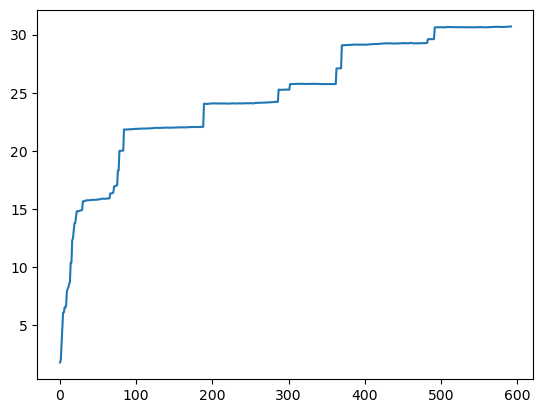

In [11]:
df.Cum_Regret.plot()